Name

Labpartner(s)

In [1]:
#import statements go here
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Class 11.2

#### Announcements

- Please message me and Victoria for coding help on slack, or your lab partners, or just post in the #coding_questions channel and we can all work together (#coding_questions is the best plan, you all often have the same/similar questions, and it makes folks feel good when they can help others). August needs a break and he is too nice to say no.

- Lots of cool animations on Monday! If you missed it, watch the recording. Lots of tips on how to make movies easier than I showed you.

- Today we are going to have a workday. For lecture I will talk about what makes a good scientific proposal, then you can use the lab period to work on your proposal or what you will. We are skipping the History of Hacking. You can do some research on your own.

- Reminder **all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by end of the day Thursday 4/1 (tomorrow) to pass the class.** The last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.


# Warmups 11.2

**W.1. (and finish for practice for this week)**
Get the movie dataset from lab 10.2 and load it into pandas. We want to finish what I started, answering the question if gross earnings is related to budget. Pull these two variables out and do a linear regression on them. You will probably have to clean them up by removing NaNs first using the methods you learned in datacamp.
Write a sentance or two describing the result of your regression analysis and what it means, that is discuss your results. How confident are you in your model, does budget predict earnings?

In [12]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

In [13]:
movies

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1


(0.0, 1000000000.0)

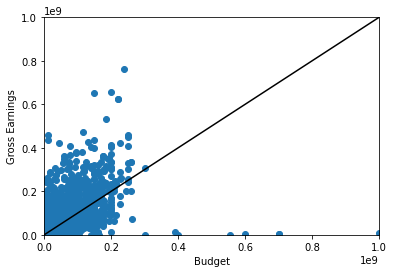

In [14]:
plt.scatter(movies['Budget'], movies['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], color='black')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

In [15]:
movies2= movies.dropna()
movies2

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
The Broadway Melody,1929.0,Musical|Romance,English,USA,Passed,100.0,1.37,379000.0,2808000.0,Harry Beaumont,...,77.0,28.0,4.0,109,167,8.0,4546,71.0,36.0,6.3
42nd Street,1933.0,Comedy|Musical|Romance,English,USA,Unrated,89.0,1.37,439000.0,2300000.0,Lloyd Bacon,...,610.0,105.0,45.0,995,439,2.0,7921,97.0,65.0,7.7
Top Hat,1935.0,Comedy|Musical|Romance,English,USA,Approved,81.0,1.37,609000.0,3000000.0,Mark Sandrich,...,610.0,172.0,23.0,824,1000,2.0,13269,98.0,66.0,7.8
Modern Times,1936.0,Comedy|Drama|Family,English,USA,G,87.0,1.37,1500000.0,163245.0,Charles Chaplin,...,309.0,8.0,8.0,352,0,1.0,143086,211.0,120.0,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Young Messiah,2016.0,Drama,English,USA,PG-13,111.0,2.35,18500000.0,6462576.0,Cyrus Nowrasteh,...,241.0,118.0,107.0,824,0,0.0,1449,30.0,24.0,5.4
Triple 9,2016.0,Action|Crime|Drama|Thriller,English,USA,R,115.0,2.35,20000000.0,12626905.0,John Hillcoat,...,14000.0,12000.0,968.0,27214,0,3.0,32567,106.0,214.0,6.3
Warcraft,2016.0,Action|Adventure|Fantasy,English,USA,PG-13,123.0,2.35,160000000.0,46978995.0,Duncan Jones,...,3000.0,716.0,648.0,5505,89000,0.0,111609,781.0,275.0,7.3


(0.0, 1000000000.0)

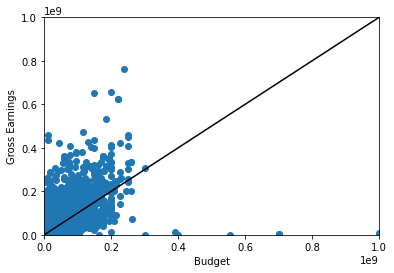

In [19]:
plt.scatter(movies2['Budget'], movies2['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], color='black')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

In [17]:
movies3= movies.fillna(1)
movies3

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,1,USA,Not Rated,123.0,1.33,385907.0,1.0,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,1,USA,1,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,1,USA,Not Rated,151.0,1.33,245000.0,1.0,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,1.0,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
War & Peace,1.0,Drama|History|Romance|War,English,UK,TV-14,1.0,16.00,1.0,1.0,1,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
Wings,1.0,Comedy|Drama,English,USA,1,30.0,1.33,1.0,1.0,1,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
Wolf Creek,1.0,Drama|Horror|Thriller,English,Australia,1,1.0,2.00,1.0,1.0,1,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1


(0.0, 1000000000.0)

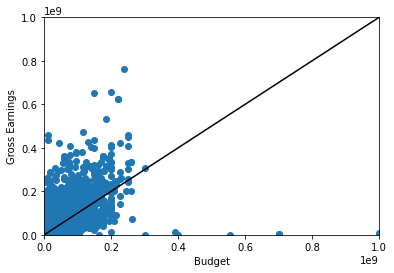

In [20]:
plt.scatter(movies2['Budget'], movies2['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], color='black')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

In [ ]:
#it seems that having a budgets set the limits for how much a movie can make. Bid budget have lower chances of having a high earnings.

# Lecture 11.2

### Agenda:
- What makes a good scientific research proposal?
    - Dataset or way to generate data to analyze (e.g. a model)
    - Well defined research question(s) that can be adressed with the above dataset/methods
    - Clear explaination of what you are going to do to answer these research questions (not too technical/jargony, but some details)
    - Convince the reader/reviewer you have the expertise and the resources to do the work (don't promise more than you can do)
    - Realistic timelines and adequate personell 
    
#### On Monday you will give a 5 min talk on your proposed research 
Just a couple of slides and some discussion

- What makes a good talk?

# Lab 11.2

Today is a workday. Catch up and work on your research proposal. I am here to assist you.

**E.1** Complete your research proposal (see assignment and checklist in folder in github)

**E.2** On Monday we will workshop research proposal plans together. This should be fun, helpful, and not too formal/serious. Prepare a few slides (2-3) on your proposed research to share with the class. Talk about your research question(s) and your proposed methods and we will ask you questions and give you feedback.

Please note both of these exercises are manditory to pass the class and must be completed on time (no late work will be accepted)

In [ ]:
PRACTICE

In [21]:
genre=movies['Genres']
genre

Title
Intolerance: Love's Struggle Throughout the Ages                             Drama|History|War
Over the Hill to the Poorhouse                                                     Crime|Drama
The Big Parade                                                               Drama|Romance|War
Metropolis                                                                        Drama|Sci-Fi
Pandora's Box                                                              Crime|Drama|Romance
                                                                       ...                    
War & Peace                                                          Drama|History|Romance|War
Wings                                                                             Comedy|Drama
Wolf Creek                                                               Drama|Horror|Thriller
Wuthering Heights                                                                Drama|Romance
Yu-Gi-Oh! Duel Monsters                     

In [22]:
country=movies['Country']
country

Title
Intolerance: Love's Struggle Throughout the Ages           USA
Over the Hill to the Poorhouse                             USA
The Big Parade                                             USA
Metropolis                                             Germany
Pandora's Box                                          Germany
                                                       ...    
War & Peace                                                 UK
Wings                                                      USA
Wolf Creek                                           Australia
Wuthering Heights                                           UK
Yu-Gi-Oh! Duel Monsters                                  Japan
Name: Country, Length: 5042, dtype: object

In [23]:
budget=movies['Budget']
budget

Title
Intolerance: Love's Struggle Throughout the Ages      385907.0
Over the Hill to the Poorhouse                        100000.0
The Big Parade                                        245000.0
Metropolis                                           6000000.0
Pandora's Box                                              NaN
                                                       ...    
War & Peace                                                NaN
Wings                                                      NaN
Wolf Creek                                                 NaN
Wuthering Heights                                          NaN
Yu-Gi-Oh! Duel Monsters                                    NaN
Name: Budget, Length: 5042, dtype: float64

In [37]:
list=movies.groupby(['Budget','Country']).sum()
list


,,Year,Duration,Aspect Ratio,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Budget,Country,,,,,,,,,,,,,,,
2.180000e+02,USA,2003.0,88.0,1.37,592014.0,20.0,58.0,20.0,0.0,78,754,3.0,5709,114.0,72.0,7.2
1.100000e+03,USA,2004.0,90.0,1.85,85222.0,16.0,86.0,23.0,16.0,163,456,0.0,4285,84.0,43.0,6.6
1.400000e+03,USA,2013.0,76.0,0.00,0.0,0.0,0.0,0.0,0.0,0,16,0.0,38,3.0,13.0,6.3
3.250000e+03,USA,2005.0,84.0,0.00,0.0,2.0,45.0,44.0,2.0,93,4,0.0,36,1.0,0.0,7.8
4.500000e+03,France,2004.0,110.0,2.35,136007.0,107.0,576.0,133.0,45.0,776,171,1.0,3924,39.0,81.0,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.127520e+09,Japan,2004.0,103.0,1.85,410388.0,78.0,488.0,336.0,101.0,991,973,1.0,13727,79.0,105.0,6.9
2.400000e+09,Japan,1997.0,134.0,1.85,2298191.0,6000.0,893.0,851.0,745.0,2710,11000,0.0,221552,570.0,174.0,8.4
2.500000e+09,Hungary,2005.0,134.0,2.35,195888.0,45.0,9.0,2.0,0.0,11,607,0.0,5603,45.0,73.0,7.1
